# **Library**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import to_categorical

# **Load Data**

In [2]:
# load the dataset but only keep the top n words, zero the rest
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
num_classes = 10 # There are 10 classes possible
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# **Biuld Model**

In [3]:
# create the model
model = Sequential() # Declare a Sequential model
# layer 1 or input
model.add(Dense(512, input_shape=(784,),activation='relu')) # Add a dense input layer of 512 units, The input shape is (784,) because the features are 784 dimensional vectors
# layer 2
model.add(Dense(512, activation='relu')) # Add a hidden layer of 512 units
# layer 3
model.add(Dense(512, activation='relu')) # Add a hidden layer of 512 units
# layer 4
model.add(Dense(num_classes,activation='softmax')) # Add an output layer of 10 units, the number of classes, The "softmax" activation ensures the output is a valid probability distribution

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/15
469/469 [==============================] - 29s 55ms/step - loss: 0.4765 - accuracy: 0.8284 - val_loss: 0.4061 - val_accuracy: 0.8497
Epoch 2/15
469/469 [==============================] - 19s 40ms/step - loss: 0.3501 - accuracy: 0.8708 - val_loss: 0.3775 - val_accuracy: 0.8669
Epoch 3/15
469/469 [==============================] - 19s 40ms/step - loss: 0.3180 - accuracy: 0.8818 - val_loss: 0.3447 - val_accuracy: 0.8758
Epoch 4/15
469/469 [==============================] - 20s 43ms/step - loss: 0.2944 - accuracy: 0.8908 - val_loss: 0.3354 - val_accuracy: 0.8789
Epoch 5/15
469/469 [==============================] - 23s 50ms/step - loss: 0.2712 - accuracy: 0.8978 - val_loss: 0.3344 - val_accuracy: 0.8772
Epoch 6/15
469/469 [==============================] - 20s 43ms/step - loss: 0.2616 - accuracy: 0.9029 - val_loss: 0.3209 - val_accuracy: 0.8845
Epoch 7/15
469/469 [==============================] - 25s 54ms/step - loss: 0.2498 - accuracy: 0.9052 - val_loss: 0.3574 - val_accuracy:

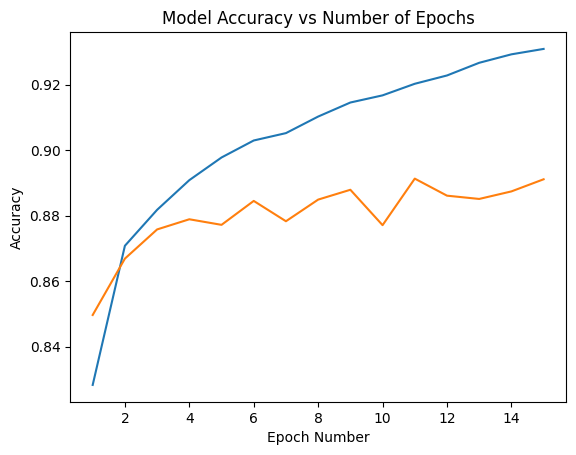

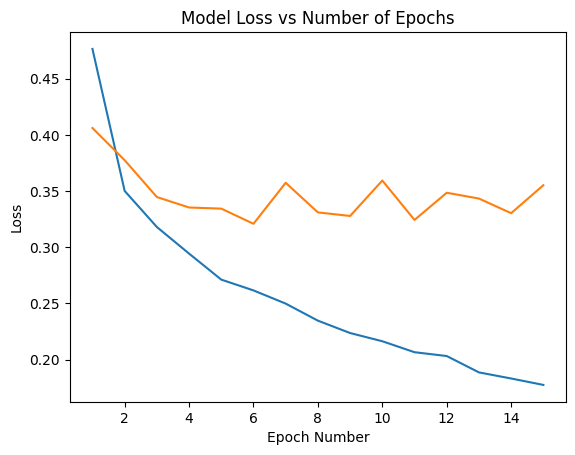

In [5]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'], label='train-acc')
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'], label='test-acc')
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.show()
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'], label='train-loss')
plt.plot(range(1,1+len(history.history['val_loss'])), history.history['val_loss'], label='train-loss')
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.show()

# **comperetion**

In [6]:
def transpose(w1,w2,w3,w4):

  w1t = w1.transpose()
  w2t = w2.transpose()
  w3t = w3.transpose()
  w4t = w4.transpose()

  return w1t, w2t, w3t, w4t

In [7]:
def prepare(w1t, w2t, w3t, w4t,t):
  layer1_size = 768
  layer2_size = 512
  layer3_size = 512
  layer4_size = 512

  max_val1 = np.absolute(w1t)
  max_val2 = np.absolute(w2t)
  max_val3 = np.absolute(w3t)
  max_val4 = np.absolute(w4t)

  max_val1.sort()
  max_val2.sort()
  max_val3.sort()
  max_val4.sort()

  max_val11 = max_val1[:,38*t]
  max_val21 = max_val2[:,25*t]
  max_val31 = max_val3[:,25*t]
  max_val41 = max_val4[:,25*t]

  for i in range(0,len(w1t)):
    for j in range(0,len(w1t[i])):
      if np.absolute(w1t[i][j]) <max_val11[i]:
        w1t[i][j] = 0

  for i in range(0,len(w2t)):
    for j in range(0,len(w2t[i])):
      if np.absolute(w2t[i][j])<max_val21[i]:
        w2t[i][j] = 0

  for i in range(0,len(w3t)):
    for j in range(0,len(w3t[i])):
      if np.absolute(w3t[i][j])<max_val31[i]:
        w3t[i][j] = 0

  for i in range(0,len(w4t)):
    for j in range(0,len(w4t[i])):
      if np.absolute(w4t[i][j])<max_val41[i]:
        w4t[i][j] = 0


  return w1t, w2t, w3t, w4t

In [9]:
data = []

for t in range(0,19):
  w1t, w2t, w3t, w4t = transpose(model.layers[0].get_weights()[0],
                               model.layers[1].get_weights()[0],
                               model.layers[2].get_weights()[0],
                               model.layers[3].get_weights()[0])

  w1t, w2t, w3t, w4t = prepare(w1t, w2t, w3t, w4t,t)

  w1, w2, w3, w4 = transpose(w1t, w2t, w3t, w4t)

  model.layers[0].set_weights([w1, model.layers[0].get_weights()[1]])
  model.layers[1].set_weights([w2, model.layers[1].get_weights()[1]])
  model.layers[2].set_weights([w3, model.layers[2].get_weights()[1]])
  model.layers[3].set_weights([w4, model.layers[3].get_weights()[1]])

  data.append(model.evaluate(X_test,Y_test, verbose=0)[-1])

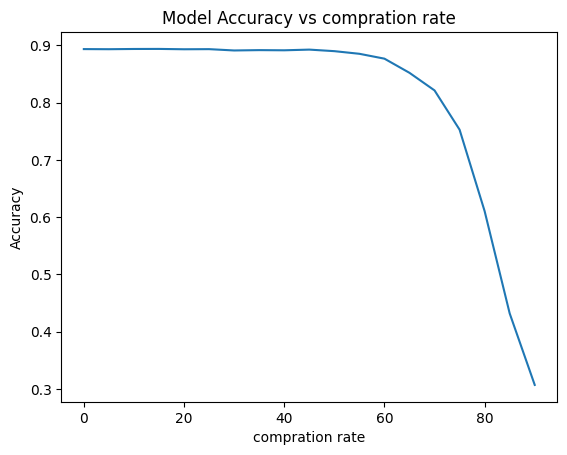

In [12]:
plt.plot(range(0,95,5), data)
plt.title('Model Accuracy vs compration rate')
plt.ylabel('Accuracy')
plt.xlabel('compration rate')
plt.show()

***all accuracy***

In [20]:
rate = 0
for tmp in data:
  print(str(rate) + ": " + str(tmp))
  rate += 5

0: 0.8931999802589417
5: 0.8930000066757202
10: 0.8934000134468079
15: 0.8934999704360962
20: 0.8928999900817871
25: 0.8931000232696533
30: 0.8907999992370605
35: 0.8913999795913696
40: 0.8910999894142151
45: 0.892300009727478
50: 0.8895999789237976
55: 0.8849999904632568
60: 0.8765000104904175
65: 0.8518000245094299
70: 0.8210999965667725
75: 0.7526000142097473
80: 0.6104000210762024
85: 0.4320000112056732
90: 0.30720001459121704


**The area under the curve**

In [14]:
sum(data) / len(data)

0.8079421065355602